In [72]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd

In [64]:
img = cv2.imread('images/fifa.jpg')

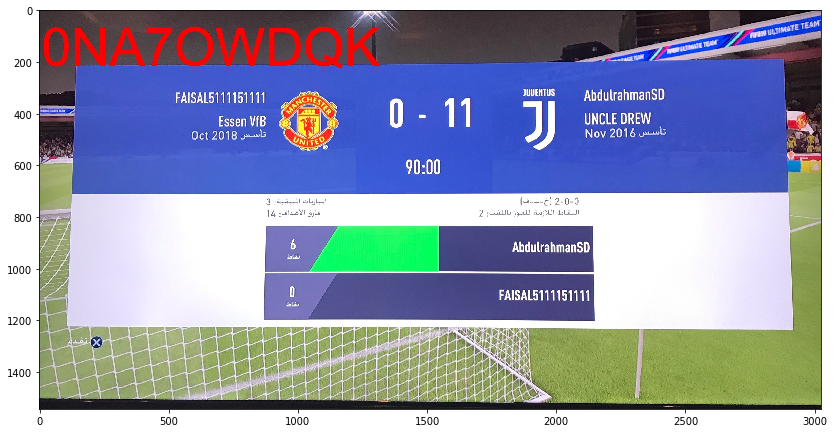

In [65]:
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

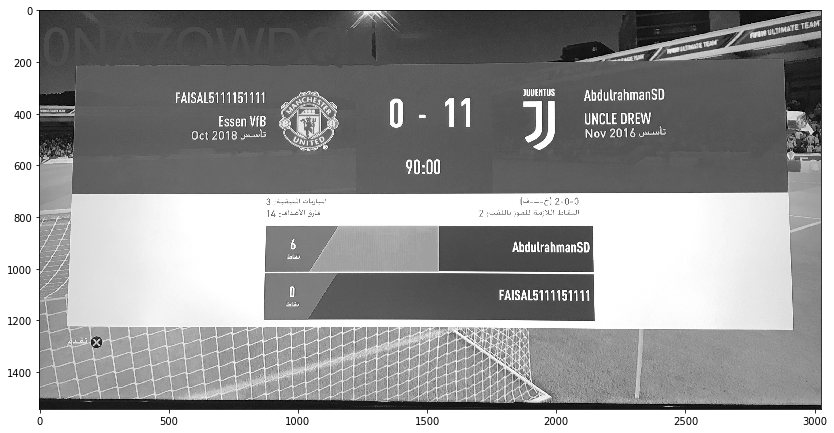

In [66]:
plt.figure(figsize=(14,8))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

# Find lines

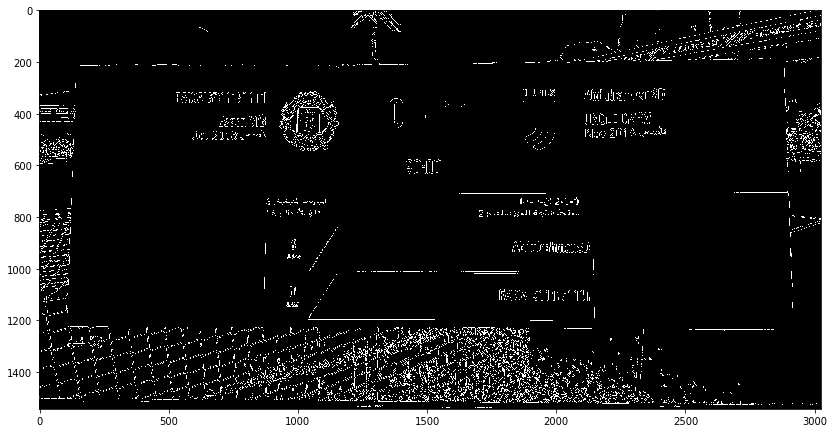

In [117]:
plt.figure(figsize=(14,8))
edges = cv2.Canny(gray, 200,50)
plt.imshow(edges,cmap='gray')

In [68]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)

In [69]:
lines.shape

(615, 1, 4)

In [70]:
lines[2][0]

array([ 875, 1018, 1689, 1018], dtype=int32)

In [71]:
lines

array([[[ 879,  835, 2141,  835]],

       [[  33, 1225, 1502, 1225]],

       [[ 875, 1018, 1689, 1018]],

       ...,

       [[2893,  427, 3003,  425]],

       [[  35, 1234, 1895, 1234]],

       [[1861,  744, 2086,  736]]], dtype=int32)

In [74]:
L = pd.DataFrame(lines.reshape(lines.shape[0],lines.shape[2]),columns=['x1','y1','x2','y2'])
L.head()

x1    y1    x2    y2
0  879   835  2141   835
1   33  1225  1502  1225
2  875  1018  1689  1018
3   99  1503   144   215
4  874  1012  1544  1012

In [77]:
L['length'] = L.apply(lambda x: np.sqrt((x[2]-x[0])**2 + (x[3]-x[1])**2),axis=1)

In [78]:
L.head()

x1    y1    x2    y2       length
0  879   835  2141   835  1262.000000
1   33  1225  1502  1225  1469.000000
2  875  1018  1689  1018   814.000000
3   99  1503   144   215  1288.785863
4  874  1012  1544  1012   670.000000

In [82]:
L = L.sort_values("length", ascending=False)

In [86]:
L.head()

x1    y1    x2    y2       length
22  74  1474  3023  1526  2949.458425
7   76  1478  3023  1529  2947.441263
11  75  1477  3022  1528  2947.441263
25  73  1471  3012  1522  2939.442464
10  74  1473  3012  1524  2938.442615

In [125]:
L.sort_values(["x1","y1"], ascending=True)

x1   y1    x2   y2      length
273     0  388   141  393  141.088625
264     0  394   125  398  125.063984
178     0  431   134  431  134.000000
378     0  533   132  526  132.185476
363     0  568   127  564  127.062977
..    ...  ...   ...  ...         ...
393  2905  458  3018  456  113.017698
325  2906  478  3012  483  106.117859
560  2909  796  2992  807   83.725743
350  2911  476  3022  482  111.162044
463  2923  463  3023  461  100.019998

[615 rows x 5 columns]

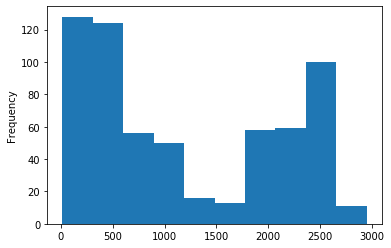

In [89]:
L.length.plot.hist()

In [91]:
L[L['length']>1500].shape

(239, 5)

In [111]:
img_res = img.copy()
for line in range(L.shape[0]):

      x1, y1, x2, y2 = L.iloc[line][:4].values
      cv2.line(img_res, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)

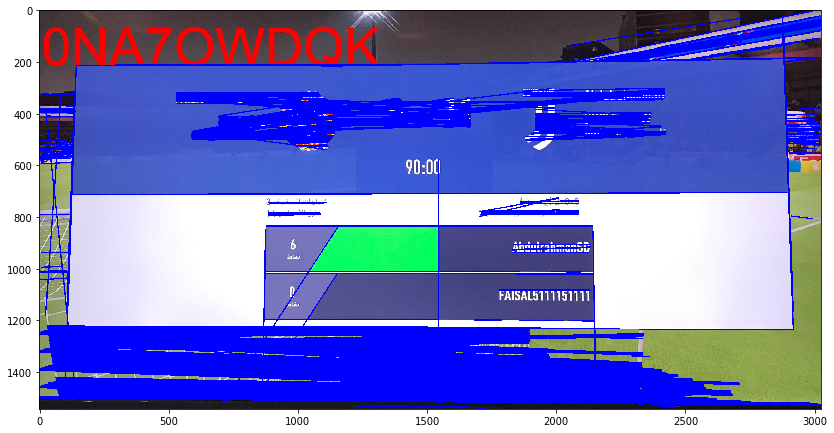

In [112]:
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))

# Find counturs

In [172]:
ret, thresh = cv2.threshold(gray, 127, 255, 0)

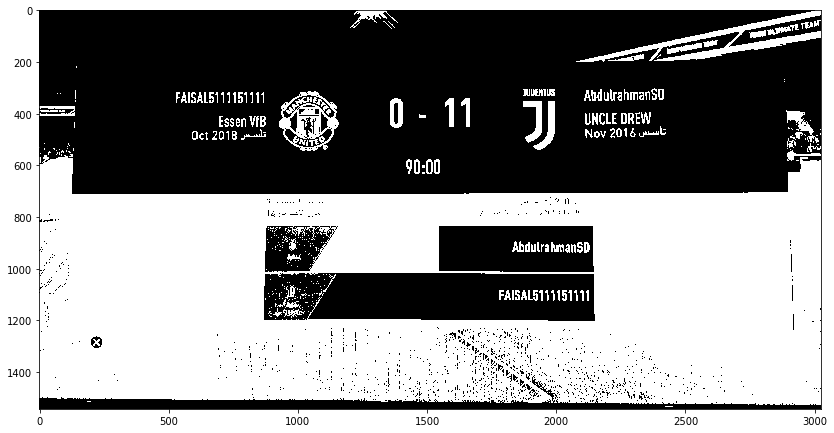

In [173]:
plt.figure(figsize=(14,8))
plt.imshow(thresh,cmap='gray')

In [191]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [192]:
len(contours)

5361

In [137]:
contours[0].shape

(16, 1, 2)

In [177]:
cv2.contourArea(contours[0])

47.0

In [202]:
cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:20]

In [189]:
cv2.contourArea(cnts[0])

2456771.0

In [139]:
hierarchy.shape

(1, 5361, 4)

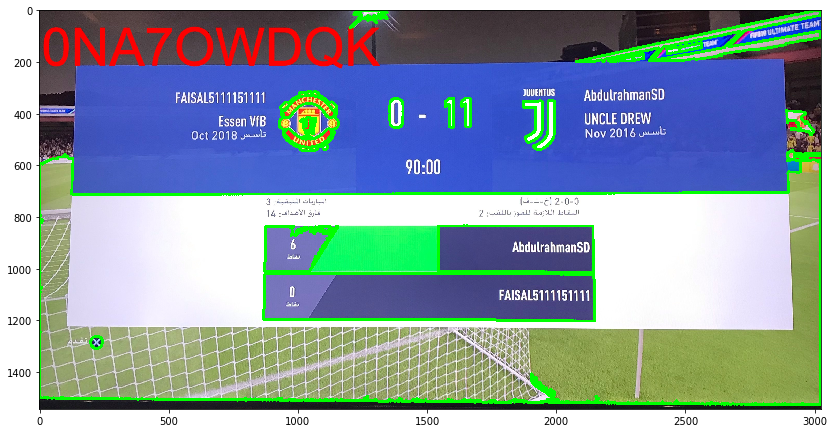

In [194]:
img_ed=img.copy()
for i in cnts:
    cnt = i
    cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

In [201]:
sorted([cv2.contourArea(i) for i in contours], reverse=True)[:10]

[2456771.0,
 228475.5,
 105956.0,
 39000.5,
 36770.5,
 34163.0,
 7312.0,
 6266.5,
 5611.0,
 5469.5]

In [203]:
# loop over our contours
final_contours = []
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
 
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:
		final_contours.append(approx)

In [205]:
len(final_contours)

4

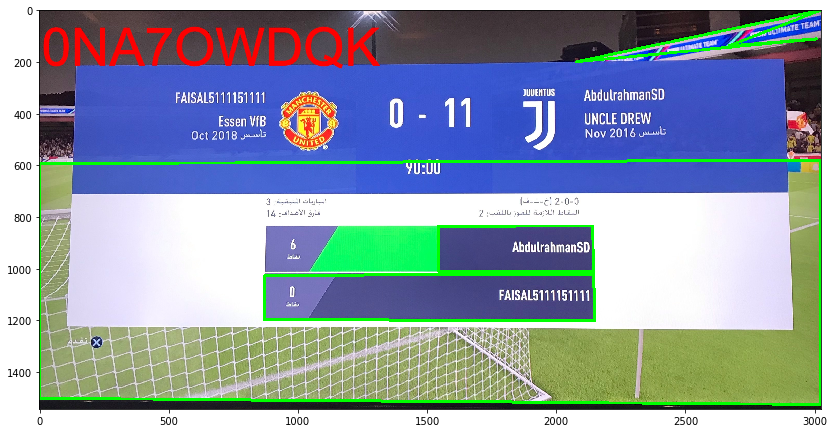

In [206]:
img_ed=img.copy()
for i in final_contours:
    cnt = i
    cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

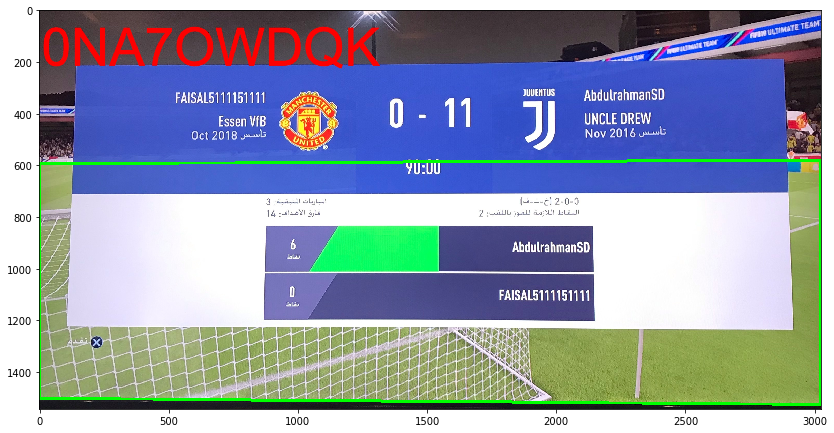

In [207]:
img_ed=img.copy()
cnt = final_contours[0]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

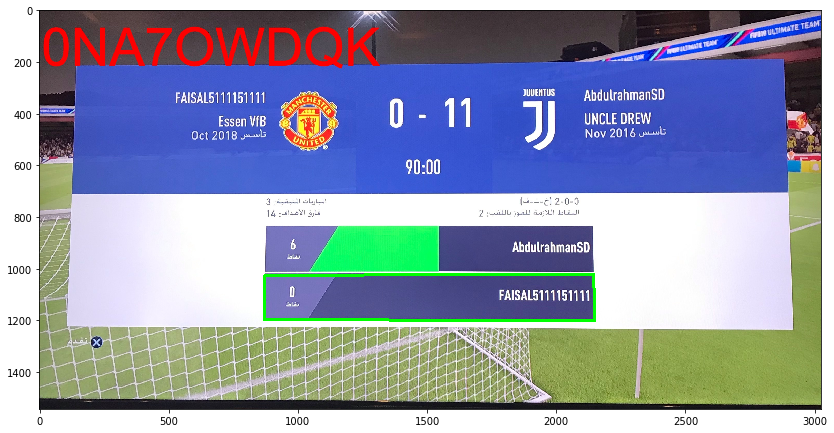

In [208]:
img_ed=img.copy()
cnt = final_contours[1]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

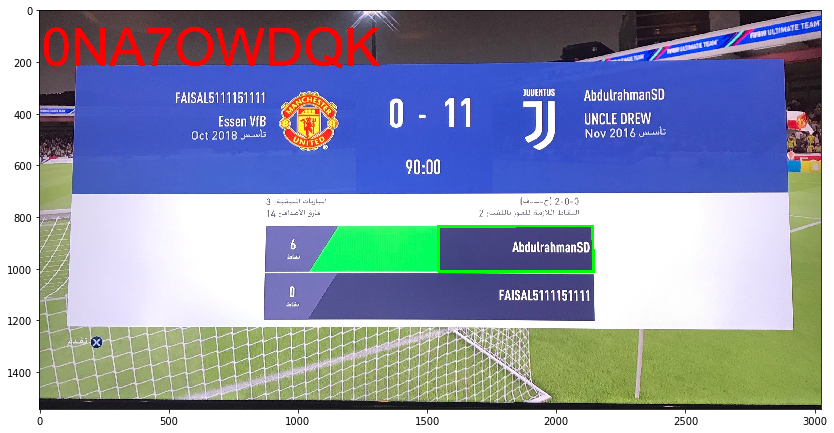

In [209]:
img_ed=img.copy()
cnt = final_contours[2]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

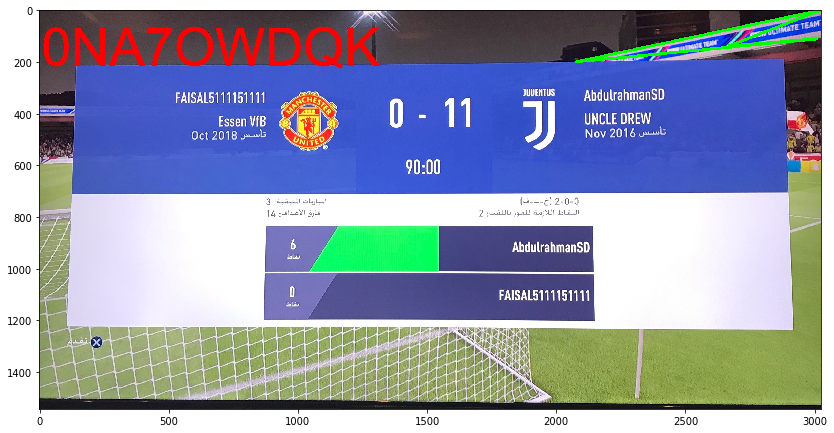

In [210]:
img_ed=img.copy()
cnt = final_contours[3]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

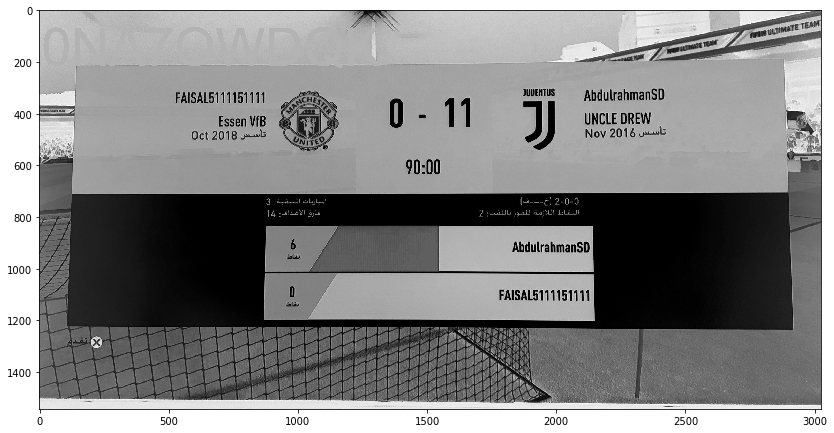

In [221]:
# let's do the same but with inverted images
img_inv = cv2.bitwise_not(gray)
plt.figure(figsize=(14,8))
plt.imshow(img_inv, cmap='gray')

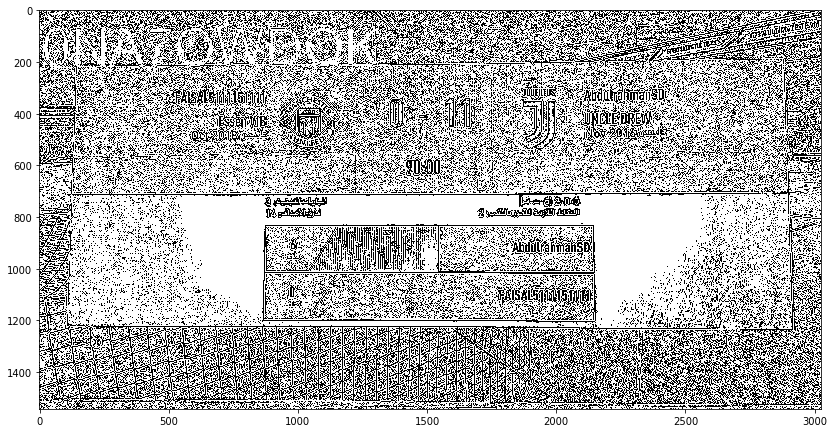

In [376]:
#ret, thresh = cv2.threshold(img_inv, 130, 255, 0)
#thresh = cv2.Canny(img_inv, 200,50)
thresh=cv2.adaptiveThreshold(gray, 200, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=9, C=0)
plt.figure(figsize=(14,8))
plt.imshow(thresh, cmap='gray')

In [377]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [378]:
cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:20]

In [379]:
# loop over our contours
final_contours = []
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
 
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:
		final_contours.append(approx)

In [380]:
len(final_contours)

6

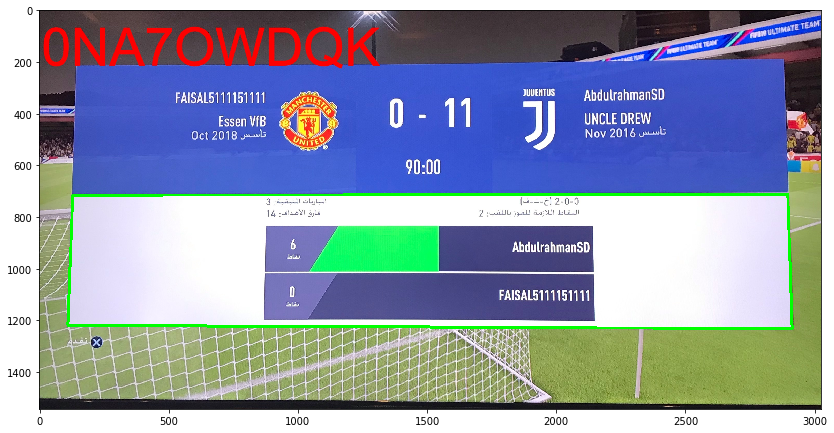

In [381]:
img_ed=img.copy()
cnt = final_contours[0]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

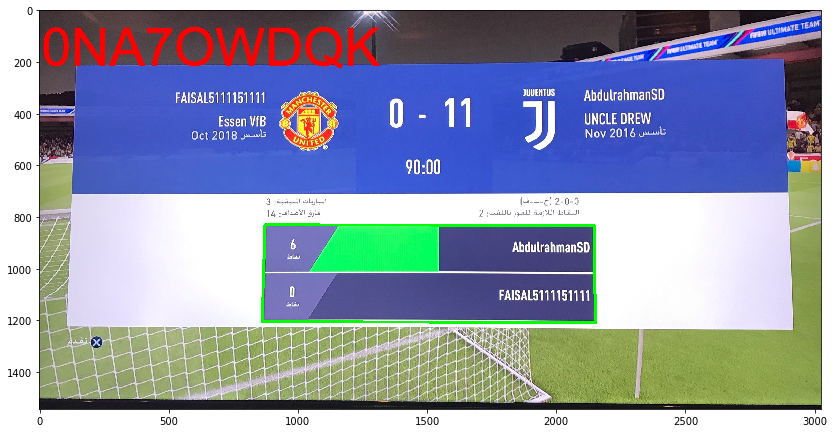

In [382]:
img_ed=img.copy()
cnt = final_contours[1]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

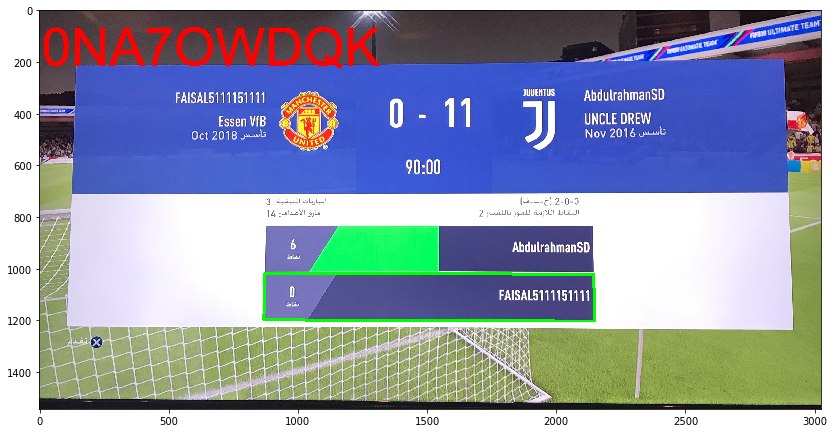

In [383]:
img_ed=img.copy()
cnt = final_contours[2]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

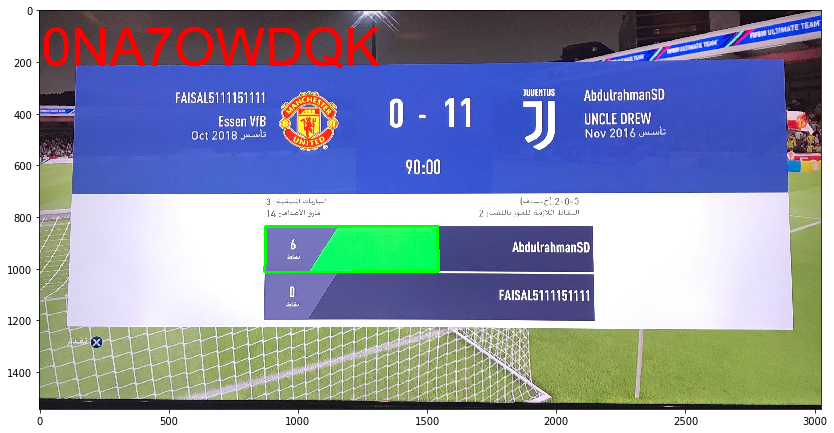

In [384]:
img_ed=img.copy()
cnt = final_contours[3]
plt.figure(figsize=(14,8))
cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

In [171]:
# using oher Contour Approximation Method
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

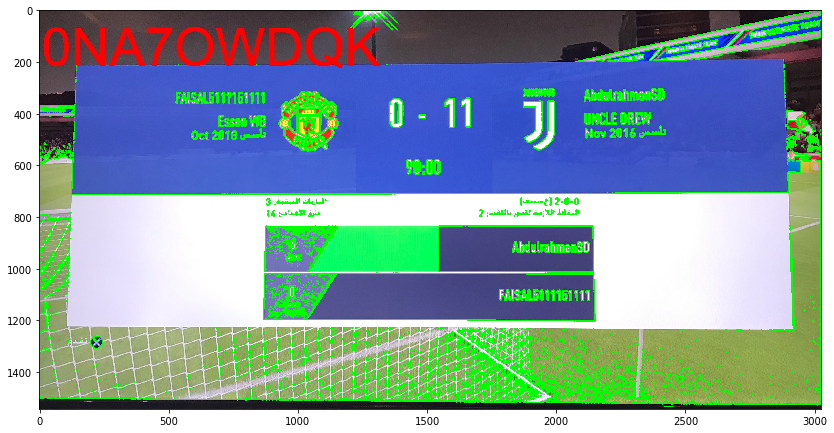

In [154]:
img_ed=img.copy()
for i in contours:
    cnt = i
    cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 3)
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))  

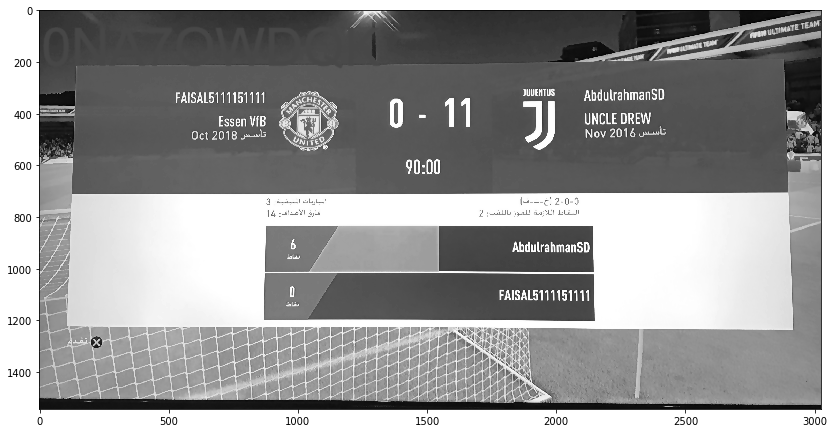

In [155]:
gray_ed = cv2.bilateralFilter(gray, 11, 17, 17)
plt.figure(figsize=(14,8))
plt.imshow(gray_ed,cmap='gray')

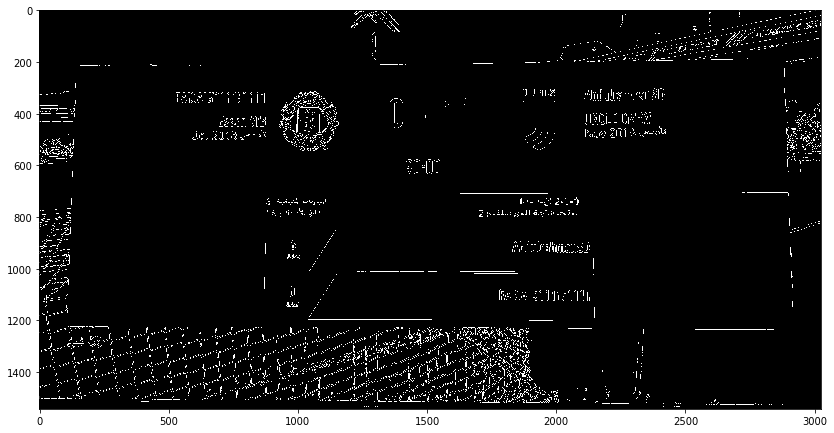

In [156]:
edged = cv2.Canny(gray_ed, 30, 200)
plt.figure(figsize=(14,8))
plt.imshow(edged,cmap='gray')

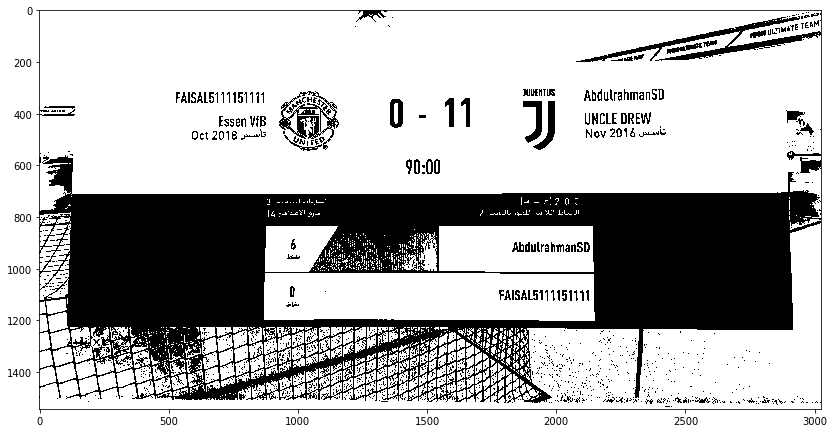

In [169]:

_,img_inv = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(14,8))
plt.imshow(img_inv,cmap='gray')

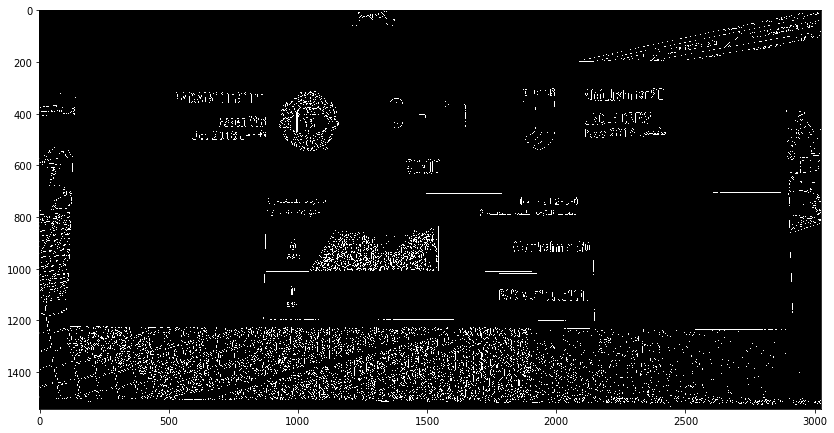

In [170]:
edged = cv2.Canny(img_inv, 30, 200)
plt.figure(figsize=(14,8))
plt.imshow(edged,cmap='gray')

In [59]:
def animate(i):
    x1, y1, x2, y2 = lines[i][0]
    cv2.line(img_ed, (x1,y1),(x2,y2),(255,0,0),3)
    plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

In [118]:
# %matplotlib inline
# img_ed=img.copy()
# plt.rcParams["animation.html"] = "jshtml"
# fig = plt.figure(figsize=(10,6))
# ani = animation.FuncAnimation(fig,animate,frames=len(lines), repeat=True)
# ani